In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
# img = cv2.imread('./data_processed/div/9UN_456_em_733.inkml.jpg')
img = cv2.imread('test.png')


In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [4]:
output = cv2.connectedComponentsWithStats(
	thresh, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

In [5]:
stats

array([[    0,     0,   515,   122, 59753],
       [  397,    12,    54,    66,   657],
       [  461,    13,    25,    30,   270],
       [  234,    23,    42,    46,   482],
       [  136,    40,    45,    11,   184],
       [   31,    42,    31,    67,   653],
       [  276,    47,    52,    28,   450],
       [  342,    47,    33,    27,   222],
       [  141,    57,    40,     9,   159]], dtype=int32)

In [6]:
new_stats = []
added = [False for i in range(len(stats))]
threshhold = .5
for i in range(1,len(stats)):
    if not added[i]:
        (xi, yi, wi, hi, ai) = stats[i]
        # print((xi, yi, wi, hi, ai))
        for j  in range(i+1,len(stats)):
            if not added[j]:
                (xj, yj, wj, hj, aj) = stats[j]
                # print('\t',(xj, yj, wj, hj, aj))
                if xi<=xj:
                    if xi+wi>=xj+wj:
                        # print((xi, yi, wi, hi, ai),(xj, yj, wj, hj, aj))
                        hi = max(yi+hi,yj+hj)
                        yi = min(yi,yj)
                        hi = hi-yi
                        ai += aj
                        added[j] = True
                        # print((xi, yi, wi, hi, ai))
                    elif xi+wi>=xj:
                        o = xi+wi-xj
                        if o/wi>threshhold or o/wj>threshhold:
                            # print((xi, yi, wi, hi, ai),(xj, yj, wj, hj, aj))
                            wi = xj+wj-xi
                            hi = max(yi+hi,yj+hj)
                            yi = min(yi,yj)
                            hi = hi-yi
                            ai += aj    
                            added[j] = True
                            # print((xi, yi, wi, hi, ai))
                if xj<xi:
                    if xj+wj>=xi+wi:
                        # print((xi, yi, wi, hi, ai),(xj, yj, wj, hj, aj))
                        xi = xj
                        wi = wj
                        hi = max(yi+hi,yj+hj)
                        yi = min(yi,yj)
                        hi = hi-yi
                        ai += aj
                        added[j] = True
                        # print((xi, yi, wi, hi, ai))
                    elif xj+wj>=xi:
                        o = xj+wj-xi
                        if o/wi>threshhold or o/wj>threshhold:
                            # print((xi, yi, wi, hi, ai),(xj, yj, wj, hj, aj))
                            wi = xj+wj-xi
                            hi = max(yi+hi,yj+hj)
                            yi = min(yi,yj)
                            hi = hi-yi
                            ai += aj
                            added[j] = True
                            # print((xi, yi, wi, hi, ai))
        new_stats.append([xi, yi, wi, hi, ai])                
        added[i] = True

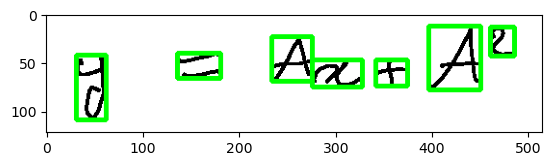

In [7]:
output = img.copy()
for i in range(len(new_stats)):
    
    x = new_stats[i][0]
    y = new_stats[i][1]
    w = new_stats[i][2]
    h = new_stats[i][3]
    area = new_stats[i][4]
    # (cX, cY) = centroids[i]

    # output = img.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    # cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    # componentMask = (labels == i).astype("uint8") * 255
    # show our output image and connected component mask
plt.imshow(output)
plt.show()